# Homework 1

This is an exploration of two methods of numerically approximating the natural log function.


In [13]:
import matplotlib.pyplot as plt
import numpy as np

#Task 1

def approx_ln(x,n):
    """
    Approximates the natural logarithm of x in n iterations
    Uses the 'slow' method of convergence
    """
    a = (1 + x) / 2.0 #a_0
    g = np.sqrt(x) #g_0
    for i in range(0, n):
        a = (a + g) / 2.0 #repeaeted definition a_i
        g = np.sqrt(a * g) #repeated definition g_i
    return (x - 1) / a


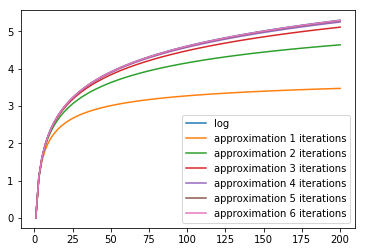

In [14]:
#Task2
"""
Plots the slow converging approx_ln function for values of n from 1 to 6.
"""

x_ax = np.linspace(1, 200, 100) #Generates 100 values of x between 1 and 200
y_ln = [np.log(i) for i in x_ax] #Generates log(x) for each x
plt.plot(x_ax, y_ln, label='log') #Plots the log function

for k in range(1, 7): #Loop that plots the approx_ln function for values of n in range(1, 7)
  y_approxln = [approx_ln(i,k) for i in x_ax]
  plt.plot(x_ax, y_approxln, label='approximation ' + str(k) + ' iterations')
  plt.legend()



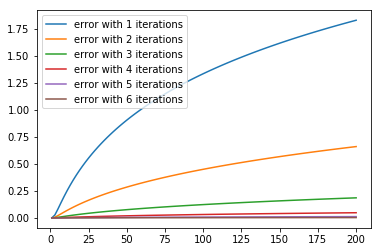

In [15]:
"""
Now plotting the difference between the built-in log function
and the programmed approx_ln function
"""

for k in range(1, 7): #Plots the absolute difference between approx_ln and the built-in log with n from 1, 7
    y_diff = [abs(approx_ln(i,k) - np.log(i)) for i in x_ax]
    plt.plot(x_ax, y_diff, label='error with ' + str(k) + ' iterations')
    plt.legend()

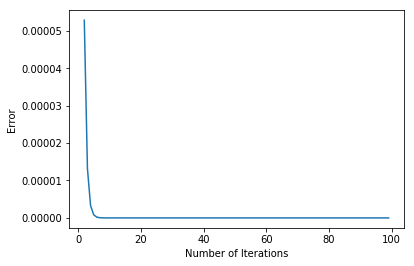

In [34]:
#Task 3
"""
Plots the error of the approx_ln function versus n, for x = 1.41
"""
x = 1.41
n = [i for i in range(2, 100)]

plt.close()
error = [abs(approx_ln(x, j + 1) - np.log(x)) for j in n]
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.plot(n, error)


In [17]:
#Task 4
def fast_approx_ln(x,n):
    """
    Approximates the logarithm using the fast convergence method
    """
    a = [(1 + x) / 2.0] #defining a_0 in a list
    g = [np.sqrt(x)] #defining g_0 in a list
    for i in range(0, n):
        a.append((a[i] + g[i]) / 2) # define all elements of a
        g.append(np.sqrt(a[i+1] * g[i])) #define all elements of g
    for k in range(1, n): #Loop through all n, the first index of d
        d = [] #let d the current row of operations
        for i in range(1, n - k + 1):
            d.append((a[i] - (4**(-k)) * a[i-1]) / (1 - 4**(-k)))
        a = d #let a be the previous row of d
    return (x - 1) / a[0]


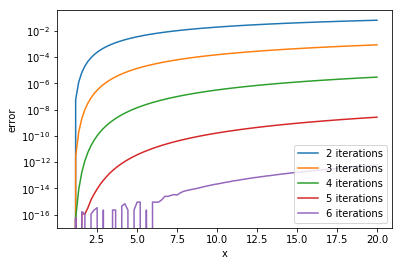

In [6]:
#Task 5

"""
Plots the difference between the fast_approx_ln and the log function for different values of n
Demonstrates the speed of convergence for different values of x, n
"""

x = np.linspace(1,20,100)
for k in range(2,7):
    error = [abs(fast_approx_ln(j,k) - np.log(j)) for j in x]
    plt.plot(x, error, label=str(k) +' iterations')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('error')
    plt.yscale('log')
    plt.ylim()